## Question 1
#### Programmatically download and load into your favorite analytical tool the transactions data. This data, which is in line-delimited JSON format, can be found
#### Please describe the structure of the data. Number of records and fields in each record?
#### Please provide some additional basic summary statistics for each field. Be sure to include a count of null, minimum, maximum, and unique values where appropriate.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score

Note: you may need to restart the kernel to use updated packages.


In [4]:
data=pd.read_json('transactions.txt',lines=True)

In [5]:
data.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.0,,,,True,,,False,False


In [6]:
data.shape

(786363, 29)

In [7]:
data.dtypes

accountNumber                 int64
customerId                    int64
creditLimit                   int64
availableMoney              float64
transactionDateTime          object
transactionAmount           float64
merchantName                 object
acqCountry                   object
merchantCountryCode          object
posEntryMode                 object
posConditionCode             object
merchantCategoryCode         object
currentExpDate               object
accountOpenDate              object
dateOfLastAddressChange      object
cardCVV                       int64
enteredCVV                    int64
cardLast4Digits               int64
transactionType              object
echoBuffer                   object
currentBalance              float64
merchantCity                 object
merchantState                object
merchantZip                  object
cardPresent                    bool
posOnPremises                object
recurringAuthInd             object
expirationDateKeyInMatch    

### Data Structure
- The dataset has 786363 rows and 29 columns 
- IsFraud is the target varible
- There are numerical features and categorical features
- There are datetime features

In [68]:
#convert object into datetime
data[['transactionDateTime','currentExpDate','accountOpenDate','dateOfLastAddressChange']]=data[['transactionDateTime','currentExpDate','accountOpenDate','dateOfLastAddressChange']].apply(pd.to_datetime,errors='coerce')

## basic summary statistics

In [7]:
data.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,7.863630e+05,7.863630e+05,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000
mean,5.372326e+08,5.372326e+08,10759.464459,6250.725369,136.985791,544.467338,544.183857,4757.417799,4508.739089
std,2.554211e+08,2.554211e+08,11636.174890,8880.783989,147.725569,261.524220,261.551254,2996.583810,6457.442068
min,1.000881e+08,1.000881e+08,250.000000,-1005.630000,0.000000,100.000000,0.000000,0.000000,0.000000
25%,3.301333e+08,3.301333e+08,5000.000000,1077.420000,33.650000,310.000000,310.000000,2178.000000,689.910000
50%,5.074561e+08,5.074561e+08,7500.000000,3184.860000,87.900000,535.000000,535.000000,4733.000000,2451.760000
75%,7.676200e+08,7.676200e+08,15000.000000,7500.000000,191.480000,785.000000,785.000000,7338.000000,5291.095000
max,9.993896e+08,9.993896e+08,50000.000000,50000.000000,2011.540000,998.000000,998.000000,9998.000000,47498.810000


#### There are many missing values with '' in this project. count these numbers below

In [12]:
#missing value for 'acqcountry' column 
(data['acqCountry'].values =='').sum()

4562

In [13]:
# missing value for 'merchantCountryCode' column
(data['merchantCountryCode'].values =='').sum()

724

In [14]:
#missing value for 'posEntryMode' column
(data['posEntryMode'].values =='').sum()

4054

In [15]:
# missing value for 'posConditionCode' column
(data['posConditionCode'].values =='').sum()

409

In [16]:
#missing value for 'posConditionCode' column
data['posConditionCode'].unique()

array(['01', '08', '99', ''], dtype=object)

In [17]:
#missing value for 'transactionType' column
(data['transactionType'].values =='').sum()

698

#### There are no values in echoBuffer, merchantCity,merchantState,posOnPremises and recurringAuthInd columns

In [18]:
#missing value for echoBuffer, merchantCity,merchantState,posOnPremises,recurringAuthInd
(data['echoBuffer'].values =='').sum(),(data['merchantCity'].values =='').sum(),(data['merchantState'].values =='').sum(),(data['merchantZip'].values =='').sum(),(data['posOnPremises'].values =='').sum(),(data['recurringAuthInd'].values =='').sum()

(786363, 786363, 786363, 786363, 786363, 786363)

#### Count the total number of missing value

In [19]:
# Total number of misssing value
(data.values =='').sum()

4728625

## To sum up in basic statistical part 
- There are no values in echoBuffer,merchantCity,merchantState,merchantZip,posOnPremises and recurringAuthInd columns, so I will delete those columns later
- The mininum value for credit limit is 250 dollars, while the maxinum value is 50000 dollars. Mean is larger than median, which means the variable is right skewed. 
- The mininum value for available money is -1005.63 dollars, while the maxinum value is 50000 dollars. The rangeis quite large; Meanwhile, Mean is a little bit smaller than median, which means the variable is left skewed. 
- The mininum value for transaction amount is 0, while the maxinum value is 2011.54 dollars. Meanwhile, Mean value is a little bit larger than median, which means the variable is right skewed. 
- The mininum value for current balance is 0, while the maxinum value is 2451.76 dollars. The difference between current balance and avaible money is that the current balance is the total amount of funds in your account and the available balance is your current balance less any outstanding holds or debits that have not yet posted to your account.

## Question 2: Plot
#### Plot a histogram of the processed amounts of each transaction, the transactionAmount column.
#### Report any structure you find and any hypotheses you have about that structure.

In [ ]:
# plot histogram for transactionamount

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

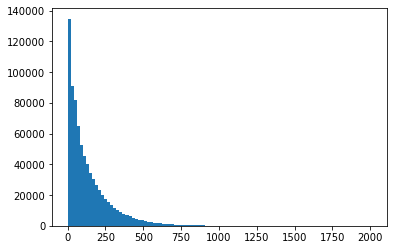

In [20]:
n_bins = 100
plt.hist(data.transactionAmount, bins=n_bins)
plt.plot

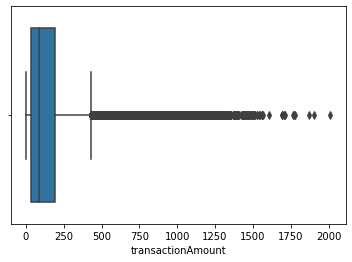

In [21]:
ax = sns.boxplot(data.transactionAmount)

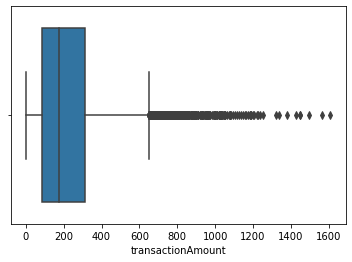

In [56]:
ax = sns.boxplot(data['transactionAmount'][data['isFraud']==True])

#### From the boxplot, we can easily notice that there are some outliers in the transactionAmount variable, so we exclude any transaction amount that is larger than 500 and plot again.

In [22]:
len(data[data['transactionAmount']>500])

25386

In [24]:
#transaction amount larger than 500 is outlier. I exclude outliers and plot histogram again. 

In [23]:
data_his=data[data['transactionAmount']<500]

[]

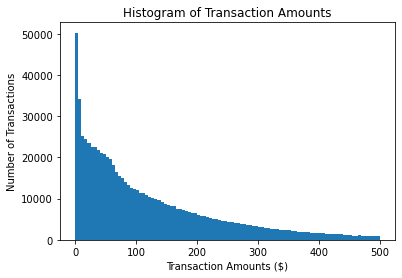

In [24]:
n_bins = 100
plt.hist(data_his['transactionAmount'], bins=n_bins)
plt.title('Histogram of Transaction Amounts')
plt.xlabel('Transaction Amounts ($)')
plt.ylabel('Number of Transactions')
plt.plot()

In [53]:
max(data['transactionAmount'])

2011.54

## Explore Categorical Features
I plot to explore categorical features,especially their relationship between isFraud variable 
- acqCountry(US, CAN, MEX, PR and unknown)
- merchantCountryCode(US, CAN, MEX, PR and unknown)
- posEntryMode(02, 09, 05, 80, 90)
- posConditionCode(01,08,99 and unknown)
- merchantCategoryCode(rideshare, entertainment, mobileapps, fastfood, food_delivery, auto, online_retail, gym, health, personal care, food, fuel, online_subscriptions, online_gifts, hotels, airline, furniture, subscriptions, cable/phone)
- transactionType(PURCHASE, ADDRESS_VERIFICATION, REVERSAL, and unknown)
- cardPresent(True,False)
- expirationDateKeyInMatch(True,False)

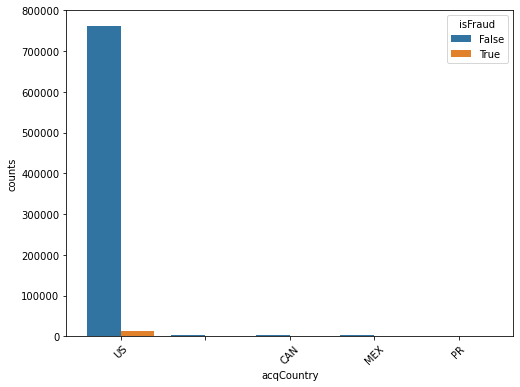

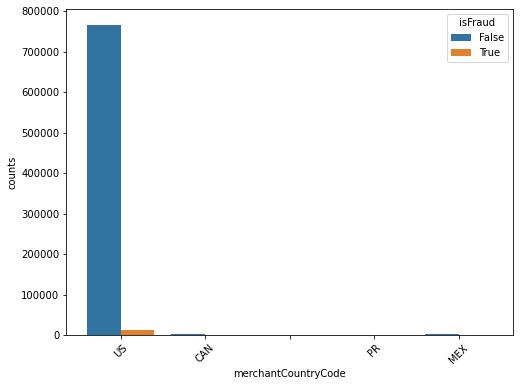

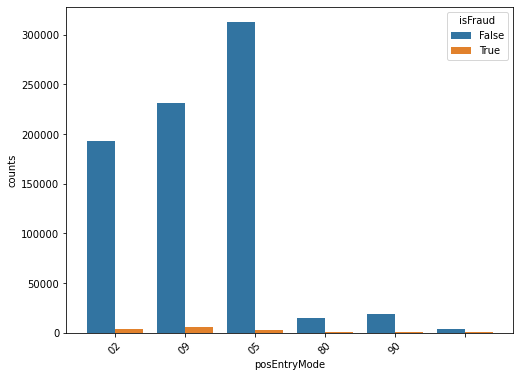

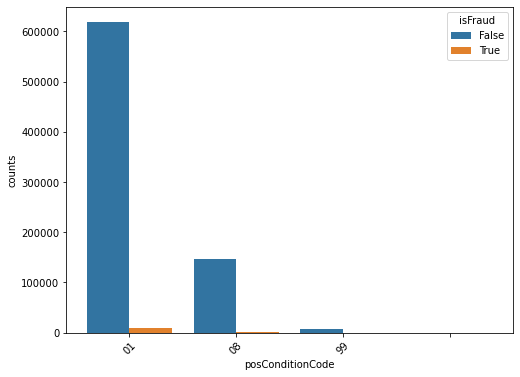

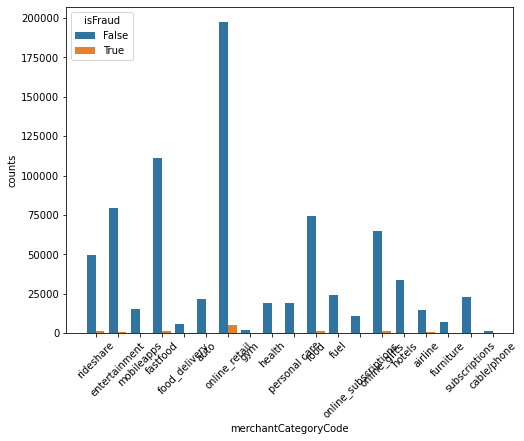

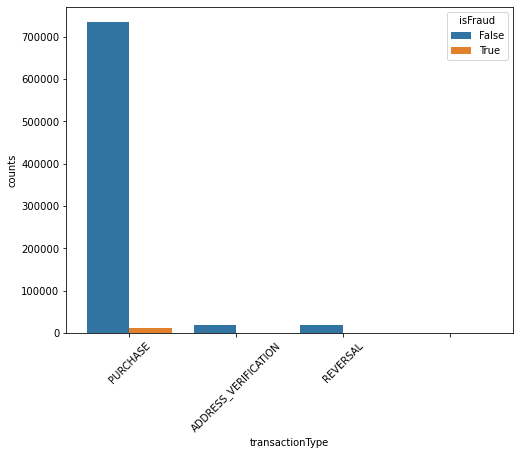

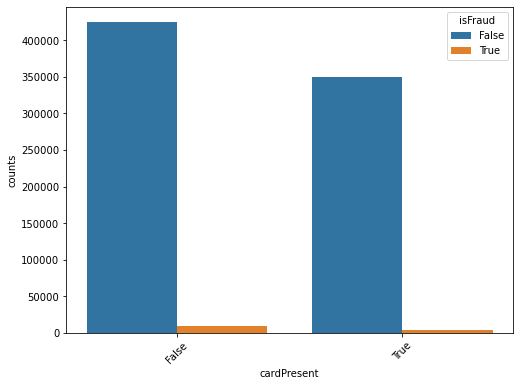

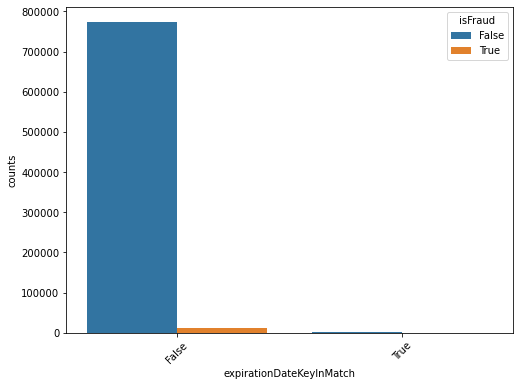

In [40]:
for i in['acqCountry','merchantCountryCode','posEntryMode','posConditionCode','merchantCategoryCode','transactionType','cardPresent','expirationDateKeyInMatch']:
        fig, ax = plt.subplots(1, figsize=(8,6))
        ax = sns.countplot(x=i, hue="isFraud", data=data)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        ax.set_xlabel(i, fontsize=10)
        ax.set_ylabel('counts', fontsize=10)
        ax.plot()

## Explore Numerical Features
- credit limit
- available money
- transaction amount
- current balance

<Figure size 432x288 with 0 Axes>

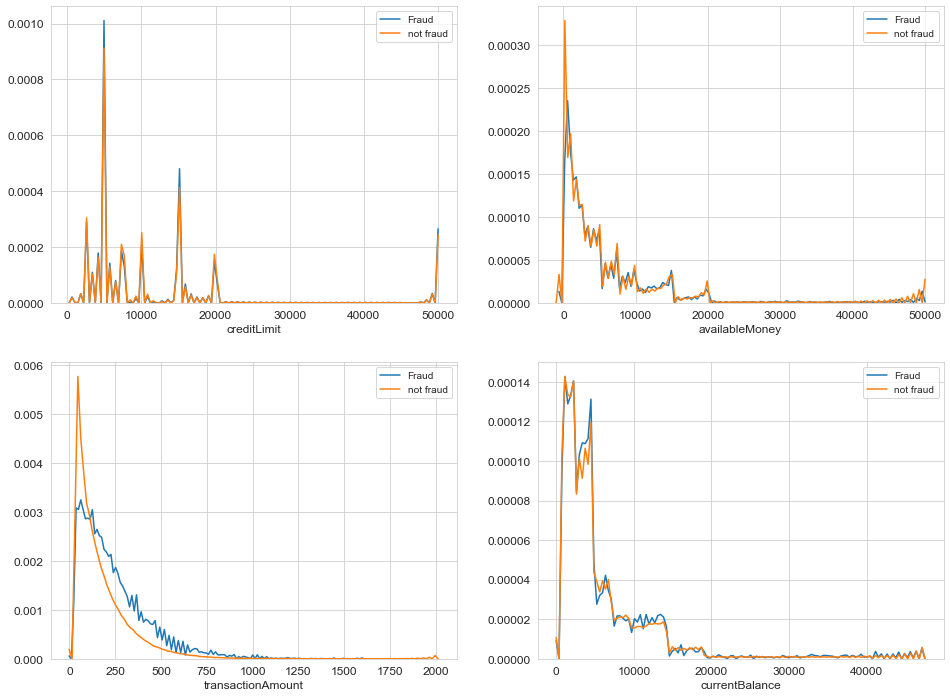

In [35]:
data1=data[['creditLimit','availableMoney','transactionAmount','currentBalance']]
var = data1.columns.values

i = 0
t0 = data.loc[data['isFraud'] == True]
t1 = data.loc[data['isFraud'] == False]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(2,2,figsize=(16,12))

for feature in var:
    i += 1
    plt.subplot(2,2,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Fraud")
    sns.kdeplot(t1[feature], bw=0.5,label="not fraud")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

### To sum up 
- I plot categorical and numerical features. From the plots, we can notice that both fradulent and non fradulent transactions have a very skewed (asymmetric) distribution. 
- There are only 12417 records of Fraud transactionAmount, taking up to 1.58%, on the contrary, 98.42% transactions are not fradulent. 
- Max value of fradulent transaction amount is 1608.35 while max value for true transaction amount is 2011.54. 
- For the total transactions, 50% of transaction amount is under 87, while for fraud transactions. 50% of amount is under 176.98, which implies most transac†ions in real life are small transac†ions

Hypothesis: Fraud are more likely to happen in small transactions rather than large transactions. Hence, banks should better focus on protecting small transactions from customers

## Question 3: Data Wrangling - Duplicate Transactions
#### You will notice a number of what look like duplicated transactions in the data set. One type of duplicated transaction is a reversed transaction, where a purchase is followed by a reversal. Another example is a multi-swipe, where a vendor accidentally charges a customer's card multiple times within a short time span.

- Can you programmatically identify reversed and multi-swipe transactions?
- What total number of transactions and total dollar amount do you estimate for the reversed transactions? For the multi-swipe transactions? (please consider the first transaction to be "normal" and exclude it from the number of transaction and dollar amount counts)
- Did you find anything interesting about either kind of transaction?


In [36]:
#identify reversed detection

In [57]:
data['transactionType'].unique()

array(['PURCHASE', 'ADDRESS_VERIFICATION', 'REVERSAL', ''], dtype=object)

In [58]:
sanity=(data['transactionType']=='REVERSAL')     

In [59]:
data_reverse=data[sanity]

In [60]:
#total dollar amount of transaction
data_reverse.transactionAmount.sum()

2821792.5

In [61]:
#total number of transaction
len(data_reverse)

20303

#### Reversed Transactions
There are four types of transaction type, which are purchase, address verification, reversal and unknown respectively. I subset transacation type=='reversal' to identify reversed transactions. 
- We can clearly see that there are 20303 records of reversed transactions. 
- The totally amount of transactions is 2821792.5 dollar

In [62]:
data = data.sort_values(by=['accountNumber','transactionDateTime'])
data

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
541900,100088067,100088067,50000,50000.00,2016-01-12T00:59:52,205.13,EZ Putt Putt #982199,US,US,02,...,,0.00,,,,True,,,False,False
541901,100088067,100088067,50000,49794.87,2016-01-12T19:49:41,46.43,Dinosaur Sandwitch Bar #303701,US,US,05,...,,205.13,,,,True,,,False,False
541902,100088067,100088067,50000,49748.44,2016-01-17T15:41:46,378.67,Mobile eCards,US,US,05,...,,251.56,,,,False,,,False,False
541903,100088067,100088067,50000,50000.00,2016-02-02T19:57:18,66.07,EZ Putt Putt #40513,US,US,02,...,,0.00,,,,True,,,False,False
541904,100088067,100088067,50000,49933.93,2016-02-03T04:48:54,141.60,34th BBQ #412895,US,US,09,...,,66.07,,,,True,,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108111,999389635,999389635,5000,4921.32,2016-09-16T15:35:24,267.62,Franks Pub #680641,US,US,09,...,,78.68,,,,True,,,False,False
108112,999389635,999389635,5000,4653.70,2016-09-22T13:58:30,4.62,Play Store,US,US,05,...,,346.30,,,,False,,,False,False
108113,999389635,999389635,5000,4674.08,2016-10-23T16:47:41,4.62,Play Store,US,US,05,...,,325.92,,,,False,,,False,False
108114,999389635,999389635,5000,4694.46,2016-11-24T00:21:46,4.62,Play Store,US,US,05,...,,305.54,,,,False,,,False,False


#### Multi-swipe transactions 
- First, I define that similar transactions(with same account number and transaction amount) in 10 minutes are multi-swipe
- Then I loop all the records to find multi-swipe transactions according to my defination
- Finally, I find 13304 records of multi-swipe transactions, with 1,917,460.02 dollars total amount 

In [69]:
def datediff(date_early, date_late):
    return(date_late - date_early).total_seconds()/60

In [70]:
is_multi_swipe= []
counter = 0
amount= 0
i=1
is_multi_swipe.append(False)
while i<len(data):
    if data.iloc[i]['accountNumber']==data.iloc[i-1]['accountNumber']\
    and datediff(data.iloc[i-1]['transactionDateTime'],data.iloc[i]['transactionDateTime'])<10\
    and data.iloc[i]['transactionAmount']==data.iloc[i-1]['transactionAmount']:
        counter+=1
        amount += data.iloc[i]['transactionAmount']
        is_multi_swipe.append(True)
    else:
        is_multi_swipe.append(False)
    i+=1;

In [71]:
df1=data[is_multi_swipe]
df1

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
541956,100088067,100088067,50000,49275.09,2016-10-16 18:01:02,411.35,Fresh Flowers,US,US,02,...,,724.91,,,,False,,,False,False
541964,100088067,100088067,50000,49811.88,2016-11-20 08:00:04,22.32,AMC #79863,US,US,09,...,,188.12,,,,True,,,False,False
87920,100328049,100328049,5000,4605.10,2016-01-15 20:36:18,43.74,Lyft,US,US,09,...,,394.90,,,,False,,,False,False
151427,100737756,100737756,250,-44.75,2016-01-18 01:55:28,693.50,Franks Deli,US,US,05,...,,294.75,,,,True,,,False,False
151428,100737756,100737756,250,-535.03,2016-01-18 01:58:26,693.50,Franks Deli,US,US,05,...,,785.03,,,,True,,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569654,999257059,999257059,15000,14177.84,2016-01-14 16:51:22,47.58,Wall Street News,US,US,09,...,,822.16,,,,False,,,False,False
569751,999257059,999257059,15000,14322.20,2016-08-09 11:25:46,557.11,Washington Times,US,US,05,...,,677.80,,,,False,,,False,False
545536,999258704,999258704,5000,4246.82,2016-03-16 07:14:17,367.13,Uber,US,US,09,...,,753.18,,,,False,,,False,False
545581,999258704,999258704,5000,4865.17,2016-09-02 03:33:07,72.93,gap.com,US,US,09,...,,134.83,,,,False,,,False,False


In [72]:
# find total amount of multi-swipe amount 
df1['transactionAmount'].sum()

1917460.02

#### interesting points for multi-swipe transactions

In [73]:
df1.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,1.330400e+04,1.330400e+04,13304.000000,13304.000000,13304.000000,13304.000000,13304.000000,13304.000000,13304.000000
mean,5.391690e+08,5.391690e+08,10918.407998,6105.978721,144.126580,542.189116,541.769393,4705.432727,4812.429276
std,2.550851e+08,2.550851e+08,11775.421070,8736.552353,150.009905,263.341425,263.298030,3011.740057,6676.553211
min,1.000881e+08,1.000881e+08,250.000000,-614.390000,0.000000,101.000000,20.000000,0.000000,0.000000
25%,3.335496e+08,3.335496e+08,5000.000000,1065.580000,36.907500,305.000000,305.000000,2112.000000,869.210000
50%,5.079073e+08,5.079073e+08,7500.000000,3089.365000,98.345000,533.000000,532.000000,4617.000000,2696.380000
75%,7.676200e+08,7.676200e+08,15000.000000,7358.775000,200.447500,787.000000,785.250000,7308.000000,5762.500000
max,9.992836e+08,9.992836e+08,50000.000000,50000.000000,1394.190000,998.000000,998.000000,9994.000000,47284.890000


- For overall transactions, 0.63% of transactions are online retails, 0.2% of transactions are online gifts, 0.16% of transactions are entertainments
- For non-fradulent transactions, 27% of transactions are online retails, 16% of transactions are fastfood, 11.33% of transactions are entertainments. 10.23% of transactions are food, 8.80% of transactions are online gifts
- For multi swipe transactions, the max transaction amount is 1394.19, while for overall transaction, the max transaction amount is around 2011.54

## Question 4: Model
#### Fraud is a problem for any bank. Fraud can take many forms, whether it is someone stealing a single credit card, to large batches of stolen credit card numbers being used on the web, or even a mass compromise of credit card numbers stolen from a merchant via tools like credit card skimming devices.

- Each of the transactions in the dataset has a field called isFraud. Please build a predictive model to determine whether a given transaction will be fraudulent or not. Use as much of the data as you like (or all of it).
- Provide an estimate of performance using an appropriate sample, and show your work.
- Please explain your methodology (modeling algorithm/method used and why, what features/data you found useful, what questions you have, and what you would do next with more time)

## Feature Engineering

- check missing values, remove some columns with no values
- Reclassify merchantCategoryCode into 7 groups for easier analysis
- count the number of fraud transactions of different merchants so as to replace 'MerchantName' feature
- convert datetime into numerical variables

I notice echoBuffer,merchantCity,merchantState,merchantZip,posOnPremises and recurringAuthIndafter columns have no values at all, so I remove those columns. Besides, there are some missing values in posEntryMode,posConditionCode, transactionType,acqCountry and merchantCountryCode columns, so I drop those missing values. After cleaning, we obtain a dataframe with 756606 rows and 24 columns.

In [75]:
data['is_multi_swipe']=is_multi_swipe

In [76]:
# save a cope of data to csv file
data.to_csv('data.csv', index=False)

In [77]:
df=data

####  accountnumber and customerid are identical, so we delete customerid. 

In [78]:
# only keep columns that have values, and exclude some columns that have values at all, like echoBuffer,merchantCity,merchantState,merchantZip,posOnPremises,recurringAuthInd
df=df.drop(columns=['echoBuffer','merchantCity','merchantState','merchantZip','posOnPremises','recurringAuthInd'])

In [79]:
# eliminate missing value 
df=df.loc[df['posEntryMode']!=''] 
df=df.loc[df['posConditionCode']!='']
df=df.loc[df['transactionType']!='']
df=df.loc[df['acqCountry']!='']
df=df.loc[df['merchantCountryCode']!='']

In [80]:
df.shape

(776668, 24)

### Recassify merchantCategoryCode

Considering too many categories in merchantCategoryCode, I reclassify them into 7 categories,which are online, food, travel, phone, health, entertainment and other.

In [81]:
df['merchantCategoryCode'].value_counts()

online_retail           199680
fastfood                110785
entertainment            79149
food                     74482
online_gifts             65424
rideshare                50510
hotels                   33669
fuel                     23631
subscriptions            22630
auto                     21345
health                   18854
personal care            18726
airline                  15188
mobileapps               14787
online_subscriptions     10928
furniture                 7347
food_delivery             6000
gym                       2183
cable/phone               1350
Name: merchantCategoryCode, dtype: int64

In [82]:
df['merchantCategoryCode']=df['merchantCategoryCode'].replace({'online_retail':'online','fastfood':'food','food':'food','online_gifts':'online',\
'rideshare':'travel','hotels':'travel','fuel':'travel','subscriptions':'other','auto':'travel','health':'health','personal care':'health',\
              'mobileapps':'phone','airline':'travel','online_subscriptions':'online','furniture':'other','food_delivery':'food','gym':'health','cable/phone':'phone'})

### Data Preprocessing for MerchantName
- There are 2490 unique names of fraud merchant, too much for one hot encoding, so I preprocess it. 
- I group by merchantName with our target variable isFraud and filter the dataset to only get merchant with fraud records, to count the number of fraud transactions for each marchant. 

In [83]:
merchant_fraud = df.groupby(['merchantName','isFraud']).size().reset_index(name = 'records_Fraud')
merchant_fraud=merchant_fraud.loc[(merchant_fraud['isFraud']==True),['merchantName','records_Fraud']]

In [84]:
df=pd.merge(merchant_fraud, df, how='outer', on=['merchantName'])
df=df.fillna(0)
df=df.iloc[:,1:]
df.rename(columns={'records_Fraud':'merchant_records_Fraud'}, inplace=True)

In [86]:
df.dtypes

merchant_records_Fraud             float64
accountNumber                        int64
customerId                           int64
creditLimit                          int64
availableMoney                     float64
transactionDateTime         datetime64[ns]
transactionAmount                  float64
acqCountry                          object
merchantCountryCode                 object
posEntryMode                        object
posConditionCode                    object
merchantCategoryCode                object
currentExpDate              datetime64[ns]
accountOpenDate             datetime64[ns]
dateOfLastAddressChange     datetime64[ns]
cardCVV                              int64
enteredCVV                           int64
cardLast4Digits                      int64
transactionType                     object
currentBalance                     float64
cardPresent                           bool
expirationDateKeyInMatch              bool
isFraud                               bool
is_multi_sw

### Convert datetime to numerical variable

In [87]:
df['daysFromLastAddressChange'] = (df['transactionDateTime'] - df['dateOfLastAddressChange']).dt.days
df['daystocurrentExpDate']=(df['currentExpDate']- df['transactionDateTime']).dt.days
df['daysfromaccountOpenDate']=(df['transactionDateTime'] - df['accountOpenDate']).dt.days
df['transactionHour'] = df['transactionDateTime'].dt.hour
df['transactionDay'] = df['transactionDateTime'].dt.day
df['transactionDow'] = df['transactionDateTime'].dt.weekday
df['transactionMonth'] = df['transactionDateTime'].dt.month

In [88]:
# convert 'isFraud' to the first column. 
df = df[ ['isFraud'] + [ col for col in df.columns if col != 'isFraud' ] ]

## Correlation Analysis

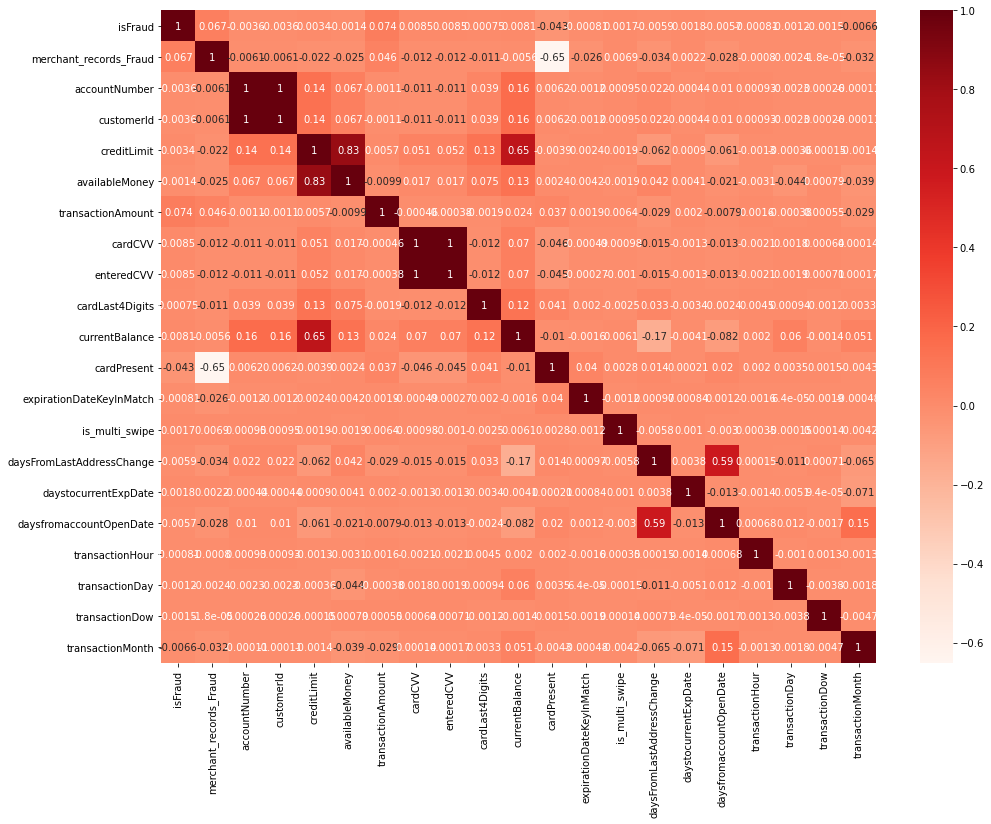

In [89]:
plt.figure(figsize=(16,12))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#### Notice
- Generall, features are not highly correlated to the target variabel isFraud
- cardCVV and enteredCVV are similar. 
- creditcard limit and current balance are correlated, which means customers would consume based on their creditcard limit value. 
- daysFromLastAddressChange and daysfromaccountopendate are correlated, which means customers are rarely move or update their address information after opening account.

## One hot encoding
I use get_dummies in Python to preprocess categorical variables, like merchantCategoryCode,acqCountry,merchantCountryCode,posEntryMode and etc. 

In [90]:
# get dummies
df = pd.concat([df,pd.get_dummies(df['merchantCategoryCode'])],axis=1) #
df = pd.concat([df,pd.get_dummies(df['acqCountry'])],axis=1) #
df = pd.concat([df,pd.get_dummies(df['transactionType'])],axis=1) #
df = pd.concat([df,pd.get_dummies(df['posConditionCode'])],axis=1) #
df = pd.concat([df,pd.get_dummies(df['posEntryMode'])],axis=1) 

In [91]:
dummies_features=['entertainment','food','health','online','other','phone','travel','CAN','MEX','PR','US','ADDRESS_VERIFICATION','PURCHASE','REVERSAL','01','08','99','02','05','09','80','90']
for i in dummies_features:
    df[i] = df[i].astype(int)

In [92]:
# get shape of dataframe after one hot encoding. 
df.shape

(776668, 53)

In [93]:
#drop columns(datetime and object columns) that I do not need. 
df=df.drop(columns=['transactionDateTime','currentExpDate','accountOpenDate','dateOfLastAddressChange'],axis=1)
df=df.drop(columns=['acqCountry','merchantCountryCode','posEntryMode','posConditionCode','merchantCategoryCode','transactionType'],axis=1)

In [94]:
# rename some columns
df=df.rename(columns={'entertainment':'categoryEntertainment','food':'categoryFood','health':'categoryHealth','online':'categoryOnline',\
                  'other':'categoryOther', 'phone':'categoryPhone', 'travel':'categoryTravel','CAN':'acqCountryCan', 'MEX':'acqCountryMex',\
                      'PR':'acqCountryPR', 'US':'acqCountryUS','01':'posConditionCode_01', '08':'posConditionCode_08', \
                     '99':'posConditionCode_99','02':'posEntryMode_02', '05':'posEntryMode_05', '09':'posEntryMode_09',\
       '80':'posEntryMode_80', '90':'posEntryMode_90'})

## Imbalanced Data 
- From the following bar plot, we can cleary see that it is a very imbalanced dataset, with only 1.58% of transactions being classified as fraudulent. 
- Most machine learning algorithms work best when the number of samples in each class are about equal.So I have to tackle with imbalanced dataset.


In [95]:
counts=df.isFraud.value_counts()

In [96]:
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 764702 non-fraudulent transactions (98.459%) and 11966 fraudulent transactions (1.541%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

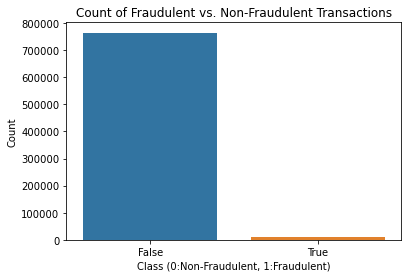

In [97]:
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

### SMOTE
- I use SMOTE to resample dataset. SMOTE(Synthetic Minority Oversampling Technique) is an oversampling technique but SMOTE working differently than your typical oversampling.SMOTE works by utilizing a k-nearest neighbor algorithm to create synthetic data. SMOTE first start by choosing random data from the minority class, then k-nearest neighbors from the data are set. Synthetic data would then made between the random data and the randomly selected k-nearest neighbor. 
- As an addition, I only oversample my training data, so I split the data first before oversampled the training data.

In [98]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df.loc[:, df.columns != 'isFraud']
y = df['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [99]:
print(X_train.shape,  X_test.shape, y_train.shape,  y_test.shape)

(520367, 42) (256301, 42) (520367,) (256301,)


In [100]:
sm = SMOTE()
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [101]:
X_train_res.shape, y_train_res.shape

((1024506, 42), (1024506,))

## Baseline Prediction with Logistic Regression

- I use StandardScaler o standardize features by subtracting the mean and then scaling to unit variance. 
- I set penalty to Ridge regularization in order to prevent overfitting to some degree.

In [102]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
X_train_s = scaling.fit_transform(X_train_res)
X_test_s = scaling.transform(X_test)

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lg = LogisticRegression(penalty = 'l2', random_state=10)
lg.fit(X_train_s, y_train_res)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=10)

In [104]:
y_pred = lg.predict(X_test)
y_proba=lg.predict_proba(X_test)[:,1]

### Evaluation Metrics
Establish evaluation metrics to evaluate the performance of logistic regression model

In [106]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


In [107]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.98      1.00      0.99    252449
        True       0.00      0.00      0.00      3852

    accuracy                           0.98    256301
   macro avg       0.49      0.50      0.50    256301
weighted avg       0.97      0.98      0.98    256301



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


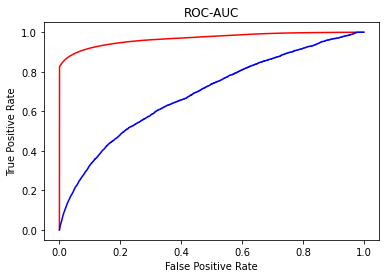

In [109]:
from sklearn.metrics import roc_curve, auc
pred_train = lg.predict_proba(X_train_s)[:,1]
pred_test = lg.predict_proba(X_test_s)[:,1]
fpr_train, tpr_train,thresholds_train= roc_curve(y_train_res, pred_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_test)
plt.plot(fpr_train, tpr_train, color='r')
plt.plot(fpr_test, tpr_test, color='b')
plt.title('ROC-AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [110]:
roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)
print("Area under the ROC curve - train data: %f" % roc_auc_train)
print("Area under the ROC curve - test data: %f" % roc_auc_test)

Area under the ROC curve - train data: 0.968672
Area under the ROC curve - test data: 0.689731


- in the model, I chose parameter penalty = 'l2' to tackle with overfitting
- I establish metrics to evaluate the performance of model, including Accuracy, classification_report, Roc-Auc and etc. Considering the nature of this project, I decide to use Roc-Auc to evaluate. From the above plot, we can see that it works great in training data, but performs not so good with test data, only with Auc 0.6897

## Random Forest Model

In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import sklearn.metrics as metrics

In [112]:
forest = RandomForestClassifier(random_state = 1)
modelF = forest.fit(X_train_res, y_train_res)
pred=modelF.predict_proba(X_test)[:,1]
y_pred = modelF.predict(X_test)

### Evaluation Metrics

In [113]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)),
print("Precision:", metrics.precision_score(y_test, y_pred)),
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.983917347181634
Precision: 0.3308270676691729
Recall: 0.06853582554517133


In [114]:
#confusion_matrix
pred = pred.astype(bool)
cnf_matrix = metrics.confusion_matrix(y_test, pred)
print("confusion_matrix:")
print(cnf_matrix)

confusion_matrix:
[[ 76274 176175]
 [   174   3678]]


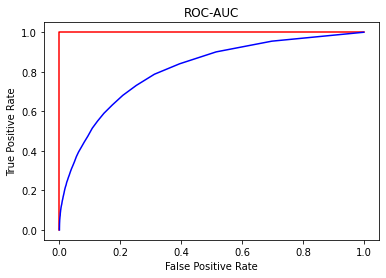

In [115]:
pred_train = modelF.predict_proba(X_train_res)[:,1]
pred_test = modelF.predict_proba(X_test)[:,1]
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_res, pred_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_test)
plt.plot(fpr_train, tpr_train, color='r')
plt.plot(fpr_test, tpr_test, color='b')
plt.title('ROC-AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [116]:
roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)
print("Area under the ROC curve - train data: %f" % roc_auc_train)
print("Area under the ROC curve - test data: %f" % roc_auc_test)

Area under the ROC curve - train data: 1.000000
Area under the ROC curve - test data: 0.810782


For training data, AUC=1, while for the test data it is only 0.81, which implies overfitting probelm. I am supposed to use GridSearchCV to tune hyperparameters and improve the model, but it runs too slow for GridSearchCV, especially in this case, with such huge dataset. So I did not use it. It is one thing that I can improve in the future for this model. 

### XGBoost

In [126]:
from xgboost import XGBClassifier
import xgboost as xgb

In [127]:
train_xgb = xgb.DMatrix(X_train_res, y_train_res, missing = np.NAN)
test_xgb = xgb.DMatrix(X_test, y_test, missing = np.NAN)

In [130]:
params = {
    'obj':'binary:logistic',
    'booster' : 'gbtree',
    'max_depth':3,
    'eta':0.2,
    'silent':False,
    'eta':0.2,
    'colsample_bytree':0.9,
    'eval_metric': 'auc'
}

In [135]:
result = xgb.train(params,train_xgb, num_boost_round=300, 
       evals=[(train_xgb, 'train'), (test_xgb, 'eval')])

[06:43:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { obj, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.82651	eval-auc:0.70582
[1]	train-auc:0.84962	eval-auc:0.68828
[2]	train-auc:0.87769	eval-auc:0.72968
[3]	train-auc:0.91672	eval-auc:0.72793
[4]	train-auc:0.92492	eval-auc:0.73302
[5]	train-auc:0.92905	eval-auc:0.73486
[6]	train-auc:0.93381	eval-auc:0.73568
[7]	train-auc:0.93651	eval-auc:0.73705
[8]	train-auc:0.94350	eval-auc:0.73767
[9]	train-auc:0.94863	eval-auc:0.74287
[10]	train-auc:0.95020	eval-auc:0.73970
[11]	train-auc:0.95024	eval-auc:0.74111
[12]	train-auc:0.95119	eval-auc:0.74175
[13]	train-auc:0.95385	eval-auc:0.74299
[14]	train-auc:0.95572	eval-auc:0.74483
[15]	train-auc:0.95643	eval-auc:0.74511
[16]	trai

In [144]:
y_prob_res = result.predict(train_xgb, ntree_limit= result.best_ntree_limit)
y_pred_res = (y_prob >= 0.1).astype(bool)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_res, y_pred_res)

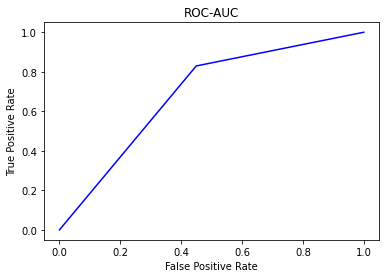

In [148]:
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred)
plt.plot(fpr_test, tpr_test, color='b')
plt.title('ROC-AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [149]:
roc_auc_test = auc(fpr_test, tpr_test)
print("Area under the ROC curve - test data: %f" % roc_auc_test)

Area under the ROC curve - test data: 0.689946


### Feature Importance

In [158]:
result_importance = result.get_score()

In [159]:
result_importance = pd.DataFrame(result_importance.items(), columns=['feature', 'score'])
result_importance['score'] = result_importance['score'] / result_importance['score'].sum()
result_importance.sort_values(['score'], ascending=False, inplace=True)
result_importance.head(10)

,feature,score
1,merchant_records_Fraud,0.198571
4,posEntryMode_09,0.074762
23,accountNumber,0.054762
3,transactionAmount,0.053333
7,posConditionCode_01,0.048571
2,posEntryMode_02,0.047619
24,cardLast4Digits,0.038571
0,posEntryMode_05,0.036190
28,creditLimit,0.026190
14,categoryEntertainment,0.025714


### Model for Improvement  
- Use GridSearch to tune hyperparameters for model